In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from config import api_key, news_api_key
from pprint import pprint
import requests
import numpy as np

In [62]:
demographic_data = "Resources/Demographic.csv"
house_price_index = "Resources/House_Prices.csv"
interest_rates = "Resources/Interest_Rates.csv"
weekly_wages = "Resources/Weekly_wage.csv"
benchmark_house_price = "Resources/Benchmark_House_Prices.csv"
inflation_rate = "Resources/Inflation_Rate.csv"

In [50]:
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
query="canadian housing market"
request = f'{url}api-key={api_key}&q={query}'
response = requests.get(request).json()

In [53]:
published_date=response["response"]["docs"][0]["pub_date"]
headline = response["response"]["docs"][0]["headline"]["main"]
snippet = response["response"]["docs"][0]["snippet"]
url_to_article = response["response"]["docs"][0]["web_url"]

# print(f'An article with the headline "{headline}" was published in The New York Times on {published_date[:10]}.')
print(f'Below is an article that was published in The New York Times on {published_date[:10]}.')
print(f'Headline: {headline}')
print(f'Snippet: {snippet}')
print(f'The article can be read here - {url_to_article}')

Below is an article that was published in The New York Times on 2021-03-05.
Headline: Why the Canadian Housing Market Is Soaring in the Pandemic
Snippet: In Toronto this week, a rundown, one-car garage sold in three days for 729,000 Canadian dollars, or $576,000.
The article can be read here - https://www.nytimes.com/2021/03/05/world/canada/canada-housing-market-covid.html


In [63]:
demographic_df = pd.DataFrame(pd.read_csv(demographic_data))
house_price_index_df = pd.DataFrame(pd.read_csv(house_price_index))
interest_rates_df = pd.DataFrame(pd.read_csv(interest_rates))
interest_rates_df.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2019-01-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.59,NaN,NaN,NaN,2
1,2019-02-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.52,NaN,NaN,NaN,2
2,2019-03-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.44,NaN,NaN,NaN,2
3,2019-04-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.33,NaN,NaN,NaN,2
4,2019-05-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.30,NaN,NaN,NaN,2


In [64]:
#Filter house_price_index_df for five year HPI and "House and Land" type
hpi_df_toronto = house_price_index_df.loc[(house_price_index_df["GEO"]=="Toronto, Ontario") 
                                          & (house_price_index_df["New housing price indexes"].str.contains("Total"))]
hpi_df_toronto[["YEAR","REF_DATE"]]=hpi_df_toronto["REF_DATE"].str.split("-",n=1,expand=True)
hpi_df_toronto

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
57,01-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,103.0,NaN,NaN,NaN,1,2019
177,02-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,103.0,NaN,NaN,NaN,1,2019
297,03-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,103.0,NaN,NaN,NaN,1,2019
417,04-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.9,NaN,NaN,NaN,1,2019
537,05-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.6,NaN,NaN,NaN,1,2019
657,06-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.6,NaN,NaN,NaN,1,2019
777,07-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.0,NaN,NaN,NaN,1,2019
897,08-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.0,NaN,NaN,NaN,1,2019
1017,09-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.3,NaN,NaN,NaN,1,2019
1137,10-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.4,NaN,NaN,NaN,1,2019


In [65]:
def plotting(year,color,label):
    hpi_df_toronto_year = hpi_df_toronto.loc[hpi_df_toronto["YEAR"]==year]
    plot = plt.plot(hpi_df_toronto_year["REF_DATE"], hpi_df_toronto_year["VALUE"], color=color, label=label)
    return plot

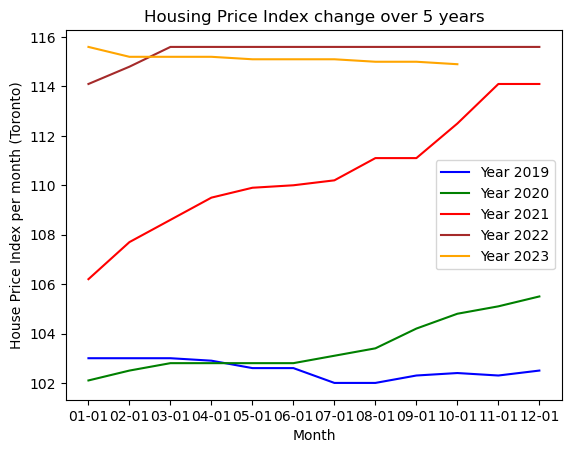

In [66]:
first_year_plot,= plotting("2019","blue","Year 2019")
second_year_plot,= plotting("2020","green","Year 2020")
third_year_plot,= plotting("2021","red","Year 2021")
fourth_year_plot,= plotting("2022","brown","Year 2022")
fifth_year_plot,= plotting("2023","orange","Year 2023")
plt.legend(handles=[first_year_plot,second_year_plot,third_year_plot,fourth_year_plot,fifth_year_plot], loc="best")
plt.xlabel("Month")
plt.ylabel("House Price Index per month (Toronto)")
plt.title("Housing Price Index change over 5 years")
plt.savefig("Images/Housing_Price_Index_change_over_5_years.png")
plt.show()

In [67]:
# interest_rates_df.head()
interest_rates_df[["YEAR","REF_DATE"]]=interest_rates_df["REF_DATE"].str.split("-",n=1,expand=True)
interest_rates_df.head()


,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
0,01-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.59,NaN,NaN,NaN,2,2019
1,02-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.52,NaN,NaN,NaN,2,2019
2,03-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.44,NaN,NaN,NaN,2,2019
3,04-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.33,NaN,NaN,NaN,2,2019
4,05-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.30,NaN,NaN,NaN,2,2019


In [68]:
interest_rates_group = interest_rates_df.groupby("YEAR")["VALUE"].mean().to_frame("Average")
round(interest_rates_group,2)

,Average
YEAR,
2019,4.25
2020,3.71
2021,3.28
2022,4.91
2023,5.92


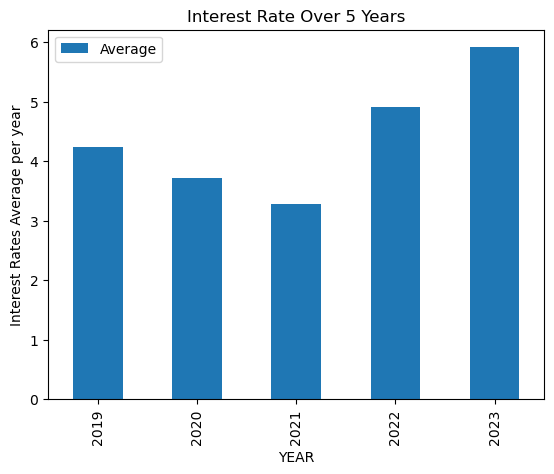

In [69]:
# plt.plot(kind="bar",interest_rates_group.index,interest_rates_group["Average"])
interest_rates_group.plot.bar(xlabel="YEAR", ylabel="Interest Rates Average per year", title="Interest Rate Over 5 Years")
plt.show()

In [70]:
interest_rates_df = interest_rates_df.rename(columns={"VALUE":"INTEREST_RATE"})
interest_rates_df.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,INTEREST_RATE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
0,01-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.59,NaN,NaN,NaN,2,2019
1,02-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.52,NaN,NaN,NaN,2,2019
2,03-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.44,NaN,NaN,NaN,2,2019
3,04-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.33,NaN,NaN,NaN,2,2019
4,05-01,Canada,2016A000011124,Percent,239,units,0,v733833,1,4.30,NaN,NaN,NaN,2,2019


In [71]:
hpi_interest_rate_df = hpi_df_toronto[["REF_DATE","YEAR","VALUE"]].copy()
hpi_interest_rate_df = hpi_interest_rate_df.reset_index()
hpi_interest_rate_df = pd.concat([hpi_interest_rate_df, interest_rates_df["INTEREST_RATE"]],axis=1)
hpi_interest_rate_df

,index,REF_DATE,YEAR,VALUE,INTEREST_RATE
0,57,01-01,2019,103.0,4.59
1,177,02-01,2019,103.0,4.52
2,297,03-01,2019,103.0,4.44
3,417,04-01,2019,102.9,4.33
4,537,05-01,2019,102.6,4.30
5,657,06-01,2019,102.6,4.23
6,777,07-01,2019,102.0,4.14
7,897,08-01,2019,102.0,4.08
8,1017,09-01,2019,102.3,4.07
9,1137,10-01,2019,102.4,4.09


In [72]:
hpi_interest_rate_df = hpi_interest_rate_df.dropna()

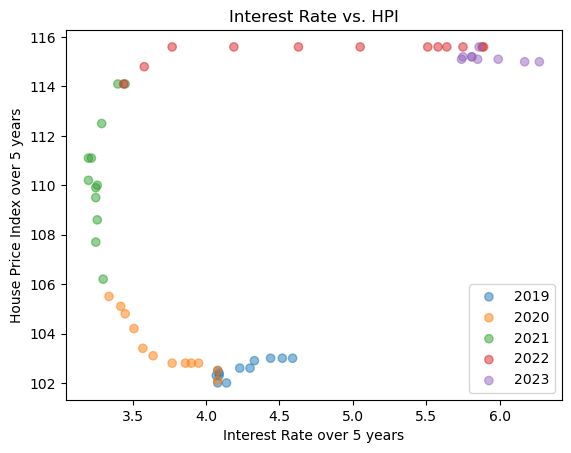

In [73]:
groups = hpi_interest_rate_df.groupby("YEAR")
for name, group in groups:
    plt.scatter(group.INTEREST_RATE, group.VALUE, marker='o', linestyle='', label=name, alpha=0.5)
plt.legend()
plt.xlabel("Interest Rate over 5 years")
plt.ylabel("House Price Index over 5 years")
plt.title("Interest Rate vs. HPI")
plt.savefig("Images/Interest_Rate_vs_HPI.png")
plt.show()

In [74]:
inflation_rate_df = pd.DataFrame(pd.read_csv(inflation_rate))
inflation_rate_df[["Date","Year"]]=inflation_rate_df["Date"].str.split("-",n=1,expand=True)
inflation_rate_df["Year"] = "20"+inflation_rate_df["Year"]
inflation_rate_df.head()

,Date,CPI-common,Year
0,Jan,1.8,2019
1,Feb,2.0,2019
2,Mar,2.0,2019
3,Apr,2.0,2019
4,May,2.1,2019


In [75]:
inflation_filter = inflation_rate_df.groupby("Year")["CPI-common"].mean().to_frame("Average_Inflation")
inflation_filter

,Average_Inflation
Year,
2019,2.166667
2020,1.641667
2021,2.550000
2022,5.366667
2023,5.210000


In [76]:
interest_rates_group

,Average
YEAR,
2019,4.246667
2020,3.714167
2021,3.277500
2022,4.909167
2023,5.916667


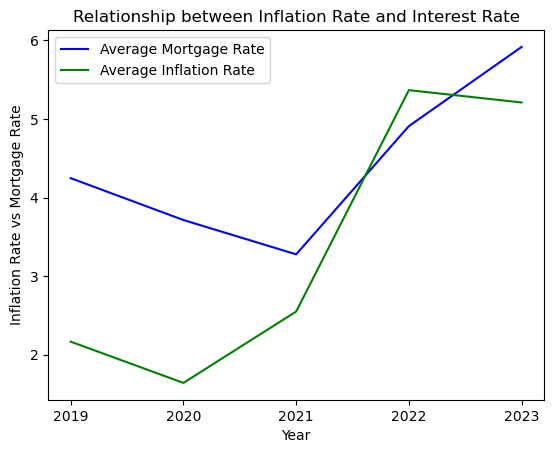

In [77]:
interest_rate_plot,= plt.plot(interest_rates_group.index, interest_rates_group["Average"], color="blue", label="Average Mortgage Rate")
inflation_rate_plot,= plt.plot(inflation_filter.index, inflation_filter["Average_Inflation"], color="green", label="Average Inflation Rate")
plt.legend(handles=[interest_rate_plot,inflation_rate_plot], loc="best")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
# plt.ylim(10000,1000000)
plt.ylabel("Inflation Rate vs Mortgage Rate")
plt.title("Relationship between Inflation Rate and Interest Rate")
plt.savefig("Images/Inflation_Interest_Rate.png")
plt.show()

In [73]:
def absolute_value(val):
    a  = round(val/100.*sizes.sum(), 1)
    return a

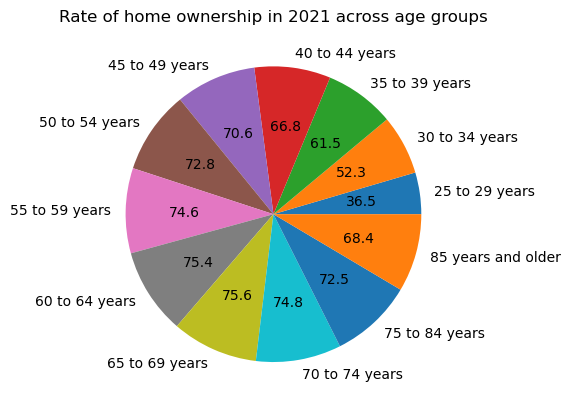

In [74]:
demographic_filter = list(demographic_df["2021"].values)
labels = list(demographic_df["Age Group"].values)
sizes = np.array(demographic_filter)
plt.pie(demographic_filter, labels=labels, autopct=absolute_value)
plt.title("Rate of home ownership in 2021 across age groups")
plt.savefig("Images/Rate_of_home_ownership_in_2021_across_age_groups.png")
plt.show()

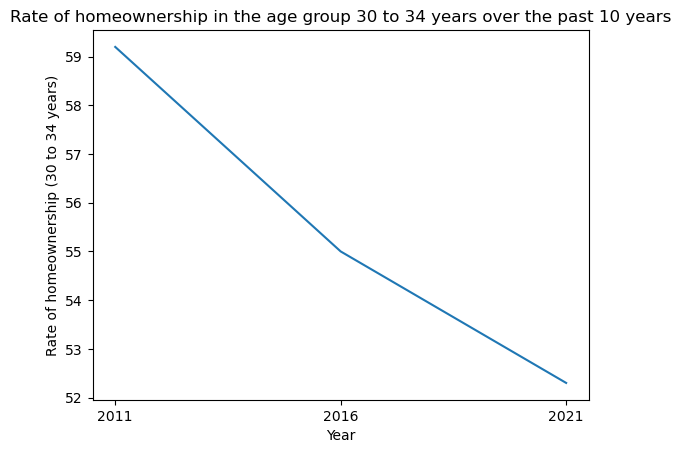

In [75]:
demographic_filter_age = demographic_df.loc[demographic_df["Age Group"]=="30 to 34 years"]
y_axis = [list(demographic_filter_age["2011"].values)[0], list(demographic_filter_age["2016"].values)[0], list(demographic_filter_age["2021"].values)[0]]
x_axis_list = list(demographic_filter_age)
x_axis = [x_axis_list[1], x_axis_list[2], x_axis_list[3]]

plt.plot(x_axis, y_axis)
plt.title("Rate of homeownership in the age group 30 to 34 years over the past 10 years")
plt.xlabel("Year")
plt.ylabel("Rate of homeownership (30 to 34 years)")
plt.show()

In [6]:
benchmark_house_price_df = pd.DataFrame(pd.read_csv(benchmark_house_price))
benchmark_house_price_df.head()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark
0,Jan 2013,145.8,146.9,141.8,148.0,144.8,147.3,383400,417700,329600,458800,273200,268600
1,Feb 2013,147.5,148.7,143.5,149.8,146.6,148.9,387900,422700,333600,464300,276600,271500
2,Mar 2013,149.2,150.4,145.4,151.5,147.8,150.0,392300,427700,338000,469600,278900,273400
3,Apr 2013,150.7,152.0,146.7,153.2,148.6,151.1,396300,432100,341000,474800,280500,275400
4,May 2013,151.7,152.9,148.0,154.0,150.8,152.2,399100,434800,344000,477400,284600,277400


In [8]:
benchmark_house_price_df[["Date","Year"]]=benchmark_house_price_df["Date"].str.split(" ",n=1,expand=True)
benchmark_house_price_df.head()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,Year
0,Jan,145.8,146.9,141.8,148.0,144.8,147.3,383400,417700,329600,458800,273200,268600,2013
1,Feb,147.5,148.7,143.5,149.8,146.6,148.9,387900,422700,333600,464300,276600,271500,2013
2,Mar,149.2,150.4,145.4,151.5,147.8,150.0,392300,427700,338000,469600,278900,273400,2013
3,Apr,150.7,152.0,146.7,153.2,148.6,151.1,396300,432100,341000,474800,280500,275400,2013
4,May,151.7,152.9,148.0,154.0,150.8,152.2,399100,434800,344000,477400,284600,277400,2013


In [12]:
house_price_filter = benchmark_house_price_df.groupby("Year")["Single_Family_Benchmark"].median().to_frame("Median Home Price")
house_price_filter

,Median Home Price
Year,
2013,435200.0
2014,465100.0
2015,506800.0
2016,592700.0
2017,659350.0
2018,645900.0
2019,654150.0
2020,713500.0
2021,918900.0


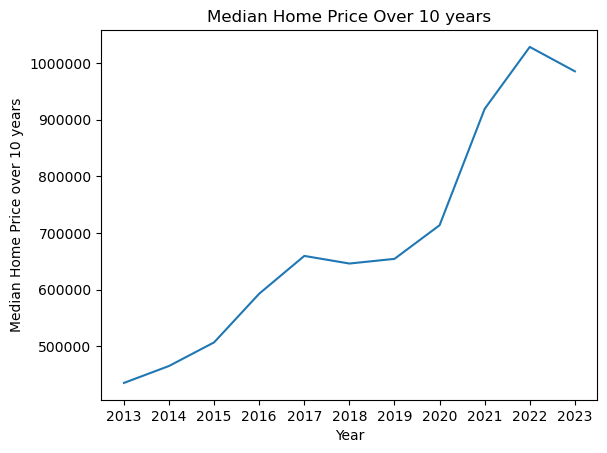

In [15]:
plt.plot(house_price_filter.index, house_price_filter["Median Home Price"])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
plt.ylabel("Median Home Price over 10 years")
plt.title("Median Home Price Over 10 years")
plt.savefig("Images/Median_Home_Price_Over_10_years")
plt.show()

In [29]:
weekly_wages_df = pd.DataFrame(pd.read_csv(weekly_wages))
weekly_wages_df = weekly_wages_df.rename(columns={"Average weekly earnings including overtime for all employees":"Weekly Earnings"})
weekly_wages_df["Weekly Earnings"] = weekly_wages_df["Weekly Earnings"].str[:-1]
weekly_wages_df.head()

,Estimate,Weekly Earnings
0,Jan-13,911.92
1,Feb-13,913.98
2,Mar-13,916.46
3,Apr-13,913.63
4,May-13,921.52


In [ ]:
weekly_wages_df["Weekly Earnings"] = weekly_wages_df["Weekly Earnings"].str.replace(",","")
weekly_wages_df["Weekly Earnings"] = pd.to_numeric(weekly_wages_df["Weekly Earnings"])

In [32]:
# for index, row in weekly_wages_df["Weekly Earnings"].iterrows:
#     weekly_wages_df[["Monthly Earnings"]]
weekly_wages_df["Monthly Earnings"] = round((weekly_wages_df["Weekly Earnings"] * 52)/12,2)
weekly_wages_df.head()

,Estimate,Weekly Earnings,Monthly Earnings
0,Jan-13,911.92,3951.65
1,Feb-13,913.98,3960.58
2,Mar-13,916.46,3971.33
3,Apr-13,913.63,3959.06
4,May-13,921.52,3993.25


In [33]:
weekly_wages_df[["Estimate","Year"]]=weekly_wages_df["Estimate"].str.split("-",n=1,expand=True)
weekly_wages_df.head()

,Estimate,Weekly Earnings,Monthly Earnings,Year
0,Jan,911.92,3951.65,13
1,Feb,913.98,3960.58,13
2,Mar,916.46,3971.33,13
3,Apr,913.63,3959.06,13
4,May,921.52,3993.25,13


In [34]:
weekly_wages_df["Year"] = "20"+weekly_wages_df["Year"]
weekly_wages_df.head()

,Estimate,Weekly Earnings,Monthly Earnings,Year
0,Jan,911.92,3951.65,2013
1,Feb,913.98,3960.58,2013
2,Mar,916.46,3971.33,2013
3,Apr,913.63,3959.06,2013
4,May,921.52,3993.25,2013


In [37]:
wages_filter = weekly_wages_df.groupby("Year")["Monthly Earnings"].sum().to_frame("Average Yearly Earning")
wages_filter

,Average Yearly Earning
Year,
2013,47842.33
2014,48799.91
2015,50092.38
2016,50664.94
2017,51641.66
2018,53137.23
2019,54577.13
2020,58639.62
2021,60678.41


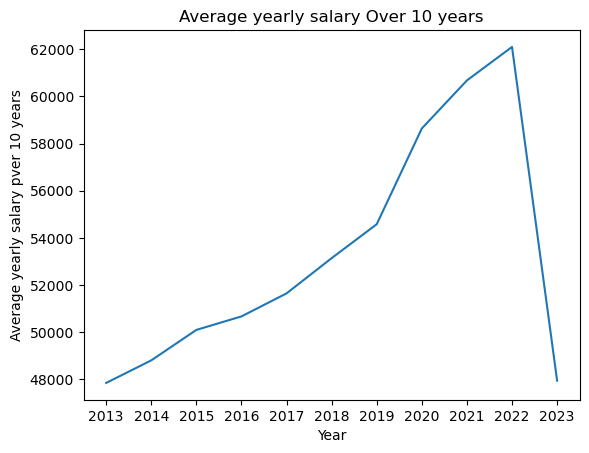

In [38]:
plt.plot(wages_filter.index, wages_filter["Average Yearly Earning"])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
plt.ylabel("Average yearly salary pver 10 years")
plt.title("Average yearly salary Over 10 years")
plt.savefig("Images/Average_Salary_Over_10_years")
plt.show()

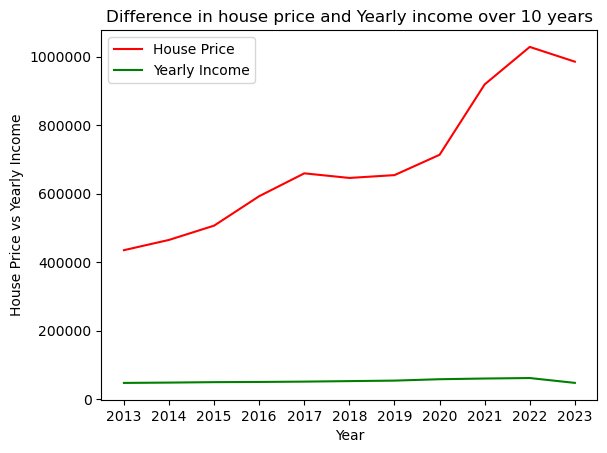

In [46]:
house_price_plot,= plt.plot(house_price_filter.index, house_price_filter["Median Home Price"], color="red", label="House Price")
salary_plot,= plt.plot(wages_filter.index, wages_filter["Average Yearly Earning"], color="green", label="Yearly Income")
plt.legend(handles=[house_price_plot,salary_plot], loc="best")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
# plt.ylim(10000,1000000)
plt.ylabel("House Price vs Yearly Income")
plt.title("Difference in house price and Yearly income over 10 years")
plt.savefig("Images/House_Price_Yearly_Wage.png")
plt.show()

In [3]:
news_url = f'https://newsapi.org/v2/everything?q=housing crisis in canada&apiKey={news_api_key}'
response = requests.get(news_url).json()
pprint(response)

{'articles': [{'author': 'Kristina Panos',
               'content': 'It sounds like a headline from the future: the '
                          'weekend before Thanksgiving, a bulldozer came for '
                          'the first example of a printed home that was '
                          'supposed to help the housing crisis in the city of '
                          'Muscat… [+1379 chars]',
               'description': 'It sounds like a headline from the future: the '
                              'weekend before Thanksgiving, a bulldozer came '
                              'for the first example of a printed home that '
                              'was supposed to help the housing crisis in the '
                              'city of Musc…',
               'publishedAt': '2023-11-29T12:00:13Z',
               'source': {'id': None, 'name': 'Hackaday'},
               'title': 'Iowa Demolishes Its First 3D Printed House',
               'url': 'https://hackaday.com/2023/1

In [35]:
counter = 1

for article in response["articles"]:
    if article["author"] == "Bloomberg News" and counter == 29:
        print('-----------------------------------------------------------------')
        print(f'An article published in bloomberg on {article["publishedAt"][:10]}')
        print(article["title"])
        print(article["description"])
        print(f'Link to read the full article - {article["url"]}')
    if (article["source"]["name"] == "CBC News") and counter == 26 :
        print(f'An article published in CBC News on {article["publishedAt"][:10]}')
        print(article["title"])
        print(article["description"])
        print(f'Link to read the full article - {article["url"]}')
    if (article["source"]["name"] == "CBC News") and counter == 47 :
        print('-----------------------------------------------------------------')
        print(f'An article published in CBC News on {article["publishedAt"][:10]}')
        print(article["title"])
        print(article["description"])
        print(f'Link to read the full article - {article["url"]}')
    if (article["source"]["name"] == "CBC News") and counter == 73 :
        print('-----------------------------------------------------------------')
        print(f'An article published in CBC News on {article["publishedAt"][:10]}')
        print(article["title"])
        print(article["description"])
        print(f'Link to read the full article - {article["url"]}')
#     print(counter)
    counter = counter + 1    

An article published in CBC News on 2023-12-05
Why some experts say modular homes could ease the Canadian housing crisis
Some experts say modular construction, built quickly in a warehouse like Lego, could be what's needed to get more Canadians into homes of their own.
Link to read the full article - https://www.cbc.ca/radio/thecurrent/why-some-experts-say-modular-homes-could-ease-the-canadian-housing-crisis-1.7049793
-----------------------------------------------------------------
An article published in bloomberg on 2023-12-12
Ottawa revives post-war playbook to speed up home construction
Ottawa will create a catalogue of home designs — a program implemented post-Second World War — to address Canada's housing crisis. Read on.
Link to read the full article - https://financialpost.com/real-estate/canada-revives-wartime-home-strategy-to-address-housing-crisis
-----------------------------------------------------------------
An article published in CBC News on 2023-12-09
Time's up for s